ref: https://github.com/chaoshangcs/GTS

In [2]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 180 kB 56.0 MB/s 
     |████████████████████████████████| 97 kB 5.2 MB/s 
     |████████████████████████████████| 139 kB 58.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=b94ffc41d4b5c9860dc9dd8ac40b33770f4395c53e0142cccabb83edd181dbd3
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=47af7e00689ccfb30134c4cc6c36f5706918d67743b3fbec140de689414ea140
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/PhD/MLCollective/graphbatt/GTS
!ls

/content/drive/MyDrive/PhD/MLCollective/graphbatt/GTS
'1. gts-graphbatt-train.ipynb'
'2. gts-graphbatt-benchmarking.ipynb'
'4. monteCarlo-gts-gaets-graphbatt-train-evaluate.ipynb'
 data
 gts-debug.ipynb
 lib
 LICENSE
 model
 models
 pytorch-geometric-temporal.ipynb
 README.md
 requirements.txt
 runs
 scripts
 train.py
 wandb


In [4]:
import argparse
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

## Load and Test Model on A New Dataset

1. on test dataset (all files)
2. on a new excel sheet -> seems like the result is not bad. But need to generate signal for longer period before seeing result


In [5]:
import torch

from tqdm.notebook import tqdm
import networkx as nx

In [10]:
# create test dataset

df = pd.read_excel("data/graphbatt/DOE-001-050-10DU_05.xlsx", sheet_name="Channel_82_1")
# keep dimension  the same with train dataset
df = df.iloc[:2257]
df.set_index("Date_Time", inplace=True)
df[["Voltage(V)", "Current(A)", "Charge_Capacity(Ah)", "Discharge_Capacity(Ah)", "Charge_Energy(Wh)", "Discharge_Energy(Wh)"]].to_hdf("data/graphbatt/DOE-001-050-10DU_05_Channel_82_1.h5", key="df")

# create larger portion of test data
!python -m scripts.generate_testing_data --output_dir=data/graphbatt/test --traffic_df_filename=data/graphbatt/DOE-001-050-10DU_05_Channel_82_1.h5

Generating testing data
x shape:  (1858, 80, 6, 1) , y shape:  (1858, 320, 6, 1)
train x:  (372, 80, 6, 1) y: (372, 320, 6, 1)
val x:  (185, 80, 6, 1) y: (185, 320, 6, 1)
test x:  (1301, 80, 6, 1) y: (1301, 320, 6, 1)


In [11]:
class DummyTrainArgs():
  def __init__(self, config_filename, use_cpu_only, temperature):
    self.config_filename = config_filename
    self.use_cpu_only = use_cpu_only
    self.temperature = temperature

args = DummyTrainArgs(config_filename="data/model/para_graphbatt_test.yaml", use_cpu_only=False, temperature=0.5)

import argparse
import yaml
from importlib import reload
import model
reload(model)
from model.pytorch.supervisor import GTSSupervisor
from lib.utils import load_graph_data

with open(args.config_filename) as f:
    supervisor_config = yaml.load(f)
    save_adj_name = args.config_filename[11:-5]
    supervisor = GTSSupervisor(save_adj_name, temperature=args.temperature, **supervisor_config)

    # some layers are only activated when .train() is called
    supervisor.train()

# NEED TO PRESS STOP IMMEDIATELY

2021-09-22 13:47:12,604 - INFO - Log directory: data/model/GTS_DR_2_h_320_64_lr_0.005_bs_64_0922134712/
2021-09-22 13:47:12,604 - INFO - Log directory: data/model/GTS_DR_2_h_320_64_lr_0.005_bs_64_0922134712/
2021-09-22 13:47:12,849 - INFO - Model created
2021-09-22 13:47:12,849 - INFO - Model created


wandb: Currently logged in as: eekosasih (use `wandb login --relogin` to force relogin)


2021-09-22 13:47:17,515 - INFO - Start training ...
2021-09-22 13:47:17,515 - INFO - Start training ...
2021-09-22 13:47:17,522 - INFO - num_batches:6
2021-09-22 13:47:17,522 - INFO - num_batches:6
Num of epoch: 0
2021-09-22 13:47:19,474 - INFO - Total trainable parameters 2596563
2021-09-22 13:47:19,474 - INFO - Total trainable parameters 2596563
2021-09-22 13:47:21,423 - INFO - Total trainable parameters 2596563
2021-09-22 13:47:21,423 - INFO - Total trainable parameters 2596563
2021-09-22 13:47:40,616 - INFO - epoch complete
2021-09-22 13:47:40,616 - INFO - epoch complete
2021-09-22 13:47:40,626 - INFO - evaluating now!
2021-09-22 13:47:40,626 - INFO - evaluating now!


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 13:47:43,279 - INFO - Epoch [0/1] (6) train_mae: 2.3570, val_mae: 2.8980
2021-09-22 13:47:43,279 - INFO - Epoch [0/1] (6) train_mae: 2.3570, val_mae: 2.8980
2021-09-22 13:47:43,851 - INFO - Saved model at 0
2021-09-22 13:47:43,851 - INFO - Saved model at 0
2021-09-22 13:47:43,856 - INFO - Val loss decrease from inf to 2.8980, saving to models/GTS/epo0.tar
2021-09-22 13:47:43,856 - INFO - Val loss decrease from inf to 2.8980, saving to models/GTS/epo0.tar


training loss,2.35704
validation loss,2.898


training loss,▁
validation loss,▁


In [ ]:
"""
Load Data Batch by Batch
"""
# load memory from the last epoch
# GTS/models/*.tar
supervisor._epoch_num = 6
supervisor.load_model()
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

label = "with_regularization"
temp = supervisor.temperature
gumbel_soft = True
batches_seen = 0

test_iterator = supervisor._data["test_loader"].get_iterator()

2021-09-17 14:19:43,614 - INFO - Loaded model at 6


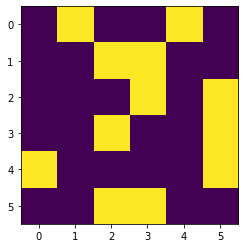

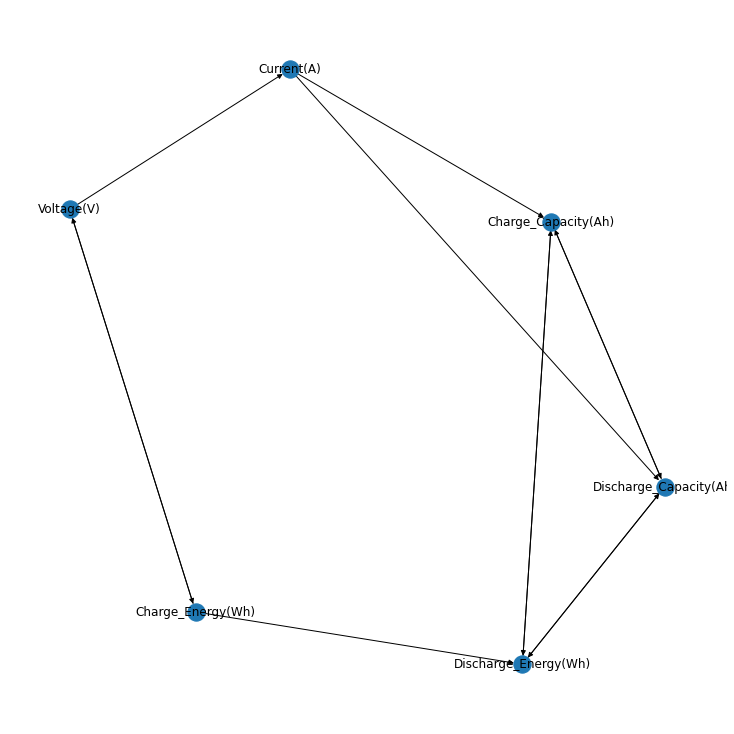

In [ ]:
"""
PLOT LEARNED ADJACENCY MATRIX
"""

adj_mx = supervisor.adj_mx.cpu().numpy()

plt.imshow(adj_mx)

G = nx.from_numpy_matrix(adj_mx, create_using=nx.DiGraph)
labels = {
    0: "Voltage(V)", 
    1: "Current(A)", 
    2: "Charge_Capacity(Ah)", 
    3: "Discharge_Capacity(Ah)", 
    4: "Charge_Energy(Wh)", 
    5: "Discharge_Energy(Wh)"
}
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels = True, labels=labels)

## Compare Performance

scripts/eval_baseline_methods.py

In [ ]:
import scripts.eval_baseline_methods

import argparse
import numpy as np
import pandas as pd

from statsmodels.tsa.vector_ar.var_model import VAR

# from lib import utils
from lib.metrics import masked_rmse_np, masked_mape_np, masked_mae_np
from lib.utils import StandardScaler

# from scripts.eval_baseline_methods import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### All


In [ ]:
"""
COMPARE PERFORMANCE
"""

test_iterator = supervisor._data["test_loader"].get_iterator()

# for each batch
var_rmses = []
var_mapes = []
var_maes = []
gts_rmses = []
gts_mapes = []
gts_maes = []

# for each batch
for batch_idx, (x, y) in tqdm(enumerate(test_iterator)):
  x, y = supervisor._prepare_data(x, y)

  # GTS predictiom
  output, mid_output = supervisor.GTS_model(label, x, supervisor._train_feas, temp, gumbel_soft, y, batches_seen)
  output = output.detach()

  # for each batch
  for i in range(x.shape[1]):
    labels = y[:, i, :].numpy()

    """
    VAR
    """
    input = x[:, i, :].numpy()

    # fit VAR model on input
    var_model = VAR(input)
    # TODO: choose best lag
    var_result = var_model.fit(31)
    var_prediction = var_result.forecast(input, 320)

    var_rmse = masked_rmse_np(preds=var_prediction, labels=labels, null_val=0)
    var_mape = masked_mape_np(preds=var_prediction, labels=labels, null_val=0)
    var_mae = masked_mae_np(preds=var_prediction, labels=labels, null_val=0)

    # keep track
    if abs(var_rmse) < np.float("inf"):
      var_rmses.append(var_rmse)
    if abs(var_mape) < np.float("inf"):
      var_mapes.append(var_mape)
    if abs(var_mae) < np.float("inf"):
      var_maes.append(var_mae)


    """
    GTS
    """
    gts_prediction = output[:, i, :].numpy()
    gts_rmse = masked_rmse_np(preds=gts_prediction, labels=labels, null_val=0)
    gts_mape = masked_mape_np(preds=gts_prediction, labels=labels, null_val=0)
    gts_mae = masked_mae_np(preds=gts_prediction, labels=labels, null_val=0)

    # keep track
    if abs(gts_rmse) < np.float("inf"):
      gts_rmses.append(gts_rmse)
    if abs(gts_mape) < np.float("inf"):
      gts_mapes.append(gts_mape)
    if abs(gts_mae) < np.float("inf"):
      gts_maes.append(gts_mae)


0it [00:00, ?it/s]

2021-09-17 14:20:43,489 - INFO - Total trainable parameters 2596563


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:96: RuntimeWarning: overflow encountered in true_divide
  mape = np.abs(np.divide(np.subtract(preds, labels).astype('float32'), labels))
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:70: RuntimeWarning: overflow encountered in square
  rmse = np.square(np.subtract(preds, labels)).astype('float32')


2021-09-17 14:20:48,643 - INFO - Total trainable parameters 2596563
2021-09-17 14:20:53,276 - INFO - Total trainable parameters 2596563
2021-09-17 14:20:58,070 - INFO - Total trainable parameters 2596563
2021-09-17 14:21:02,722 - INFO - Total trainable parameters 2596563
2021-09-17 14:21:07,412 - INFO - Total trainable parameters 2596563
2021-09-17 14:21:12,221 - INFO - Total trainable parameters 2596563
2021-09-17 14:21:16,920 - INFO - Total trainable parameters 2596563
2021-09-17 14:21:21,546 - INFO - Total trainable parameters 2596563
2021-09-17 14:21:26,164 - INFO - Total trainable parameters 2596563
2021-09-17 14:21:30,796 - INFO - Total trainable parameters 2596563
2021-09-17 14:21:35,454 - INFO - Total trainable parameters 2596563
2021-09-17 14:21:40,141 - INFO - Total trainable parameters 2596563
2021-09-17 14:21:44,750 - INFO - Total trainable parameters 2596563
2021-09-17 14:21:49,406 - INFO - Total trainable parameters 2596563
2021-09-17 14:21:54,006 - INFO - Total trainable

GTS 0.3013121 0.3027864 0.119405955
VAR 0.3844096 0.4232905 0.13014643


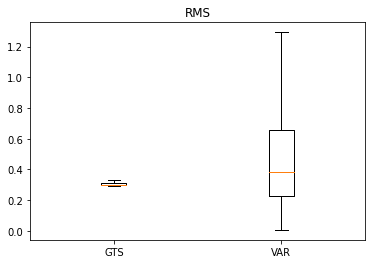

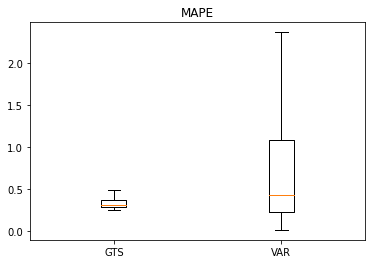

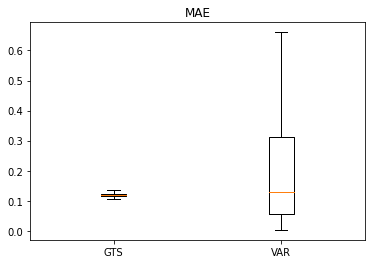

In [ ]:
"""
TEST RESULTS
"""

print("GTS", np.median(gts_rmses), np.median(gts_mapes), np.median(gts_maes))
print("VAR", np.median(var_rmses), np.median(var_mapes), np.median(var_maes))

scores = [
    ("RMS", ["GTS", "VAR"], [gts_rmses, var_rmses]),
    ("MAPE", ["GTS", "VAR"], [gts_mapes, var_mapes]),
    ("MAE", ["GTS", "VAR"], [gts_maes, var_maes]),
]

for score_name, score_ticks, score_values in scores:
  plt.title(score_name)
  for i, score_value in enumerate(score_values):
    plt.boxplot(score_value, positions=[i], showfliers=False)
  plt.xticks(range(len(score_ticks)), score_ticks)
  plt.plot()
  plt.show()


0


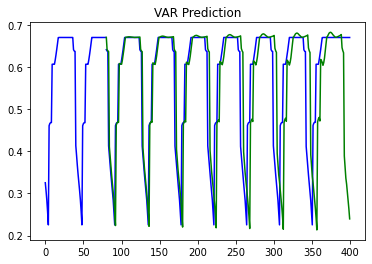

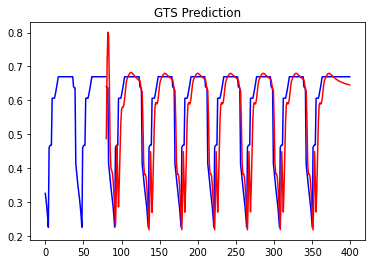

1


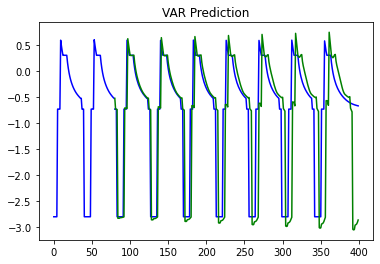

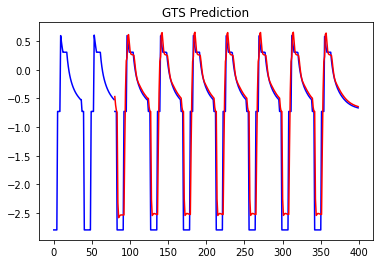

2


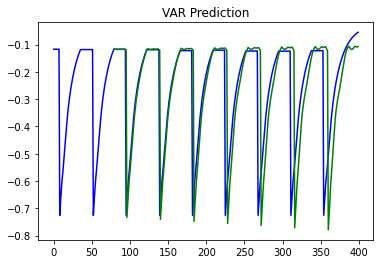

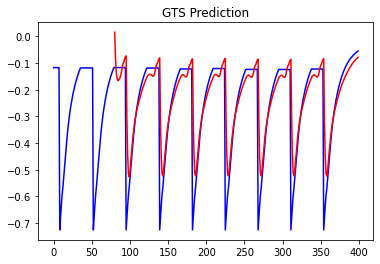

3


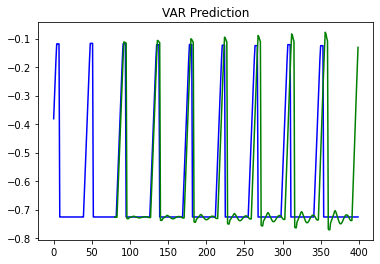

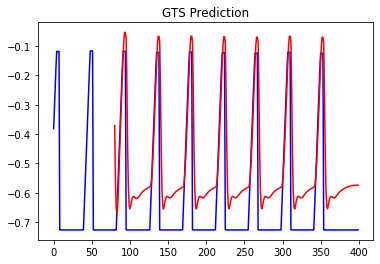

4


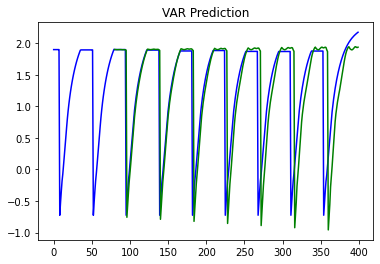

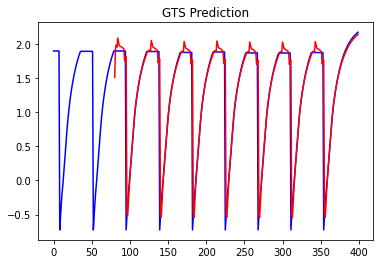

5


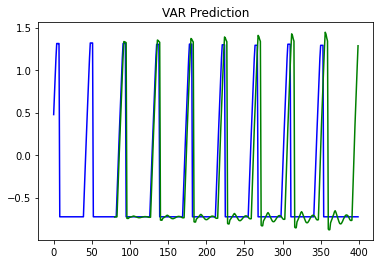

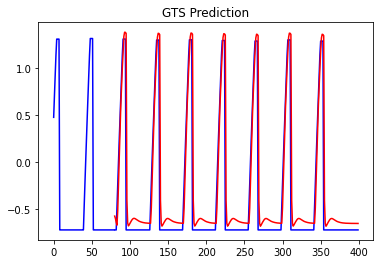

In [ ]:
"""
Example Visualisation
"""

# for each measurement
for i in range(6):

  print(i)

  plt.title("VAR Prediction")
  plt.plot(range(input.shape[0]), input[:, i], c="b")
  plt.plot(range(input.shape[0], input.shape[0] + labels.shape[0]), labels[:, i], c="b")
  plt.plot(range(input.shape[0], input.shape[0] + labels.shape[0]), var_prediction[:, i], c="g")
  plt.show()

  plt.title("GTS Prediction")
  plt.plot(range(input.shape[0]), input[:, i], c="b")
  plt.plot(range(input.shape[0], input.shape[0] + labels.shape[0]), labels[:, i], c="b")
  plt.plot(range(input.shape[0], input.shape[0] + labels.shape[0]), gts_prediction[:, i], c="r")
  plt.show()

## Test

In [ ]:
# statsmodels.tsa.arima.model.ARIMA

## To Do

ref: https://arxiv.org/pdf/2101.06861.pdf

1. ARIMA -> statsmodel ARIMA
2. LSTM -> torch (multivariate)
3. LDS, DCRNN -> PyG Temporal

wandb to compare all models